# Lab 1: Machine Learning with Python using Scikit-learn 


# Machine learning: the problem setting

In machine learning, we usually have a bunch of data samples and we want to predict something about new, unseen data. Each data sample can have multiple pieces of information (like height, weight, age, etc.), which we call features. So, we use the data we have to learn how to make predictions about new data based on its features.

-------------------------------------------------------------------------------------------------------------------
Learning problems fall into a few categories:

# supervised learning

in which the data comes with additional attributes that we want to predict 

This problem can be either:

classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

# unsupervised learning

in which the training data consists of a set of input vectors x without any corresponding target values. 

The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization

-------------------------------------------------------------------------------------------------------------------

# Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

#  Dataset loading utilities using Scikit-learn

The sklearn.datasets package embeds some small toy datasets
This package also features helpers to fetch larger datasets commonly used by the machine learning community to benchmark algorithms on data that comes from the ‘real world’.

There are three main kinds of dataset interfaces that can be used to get datasets depending on the desired type of dataset.

1. The dataset loaders: They can be used to load small standard datasets
2. The dataset fetchers: They can be used to download and load larger datasets

   Both loaders and fetchers functions return a Bunch object holding at least two items: an array of shape n_samples * n_features with key data and a numpy array of length n_samples, containing the target values, with key target.

   The Bunch object is a dictionary that exposes its keys as attributes.

   In scikit-learn datasets, each dataset comes with some additional information:

      + DESCR Attribute: This is a description of the dataset. It provides details about where the data came from, how it was collected, and what each feature represents. It gives you a better understanding of the dataset.

      + feature_names: For datasets where each data sample has multiple features, feature_names provides the names of these features. For example, in a dataset about iris flowers, feature_names might include "sepal length," "sepal width," "petal length," and "petal width."

      + target_names: For datasets where you're trying to predict a specific category or value (like the species of an iris flower), target_names provides the names of these categories or values. For example, in the iris dataset, target_names might include "setosa," "versicolor," and "virginica."

3. The dataset generation functions: They can be used to generate controlled synthetic datasets


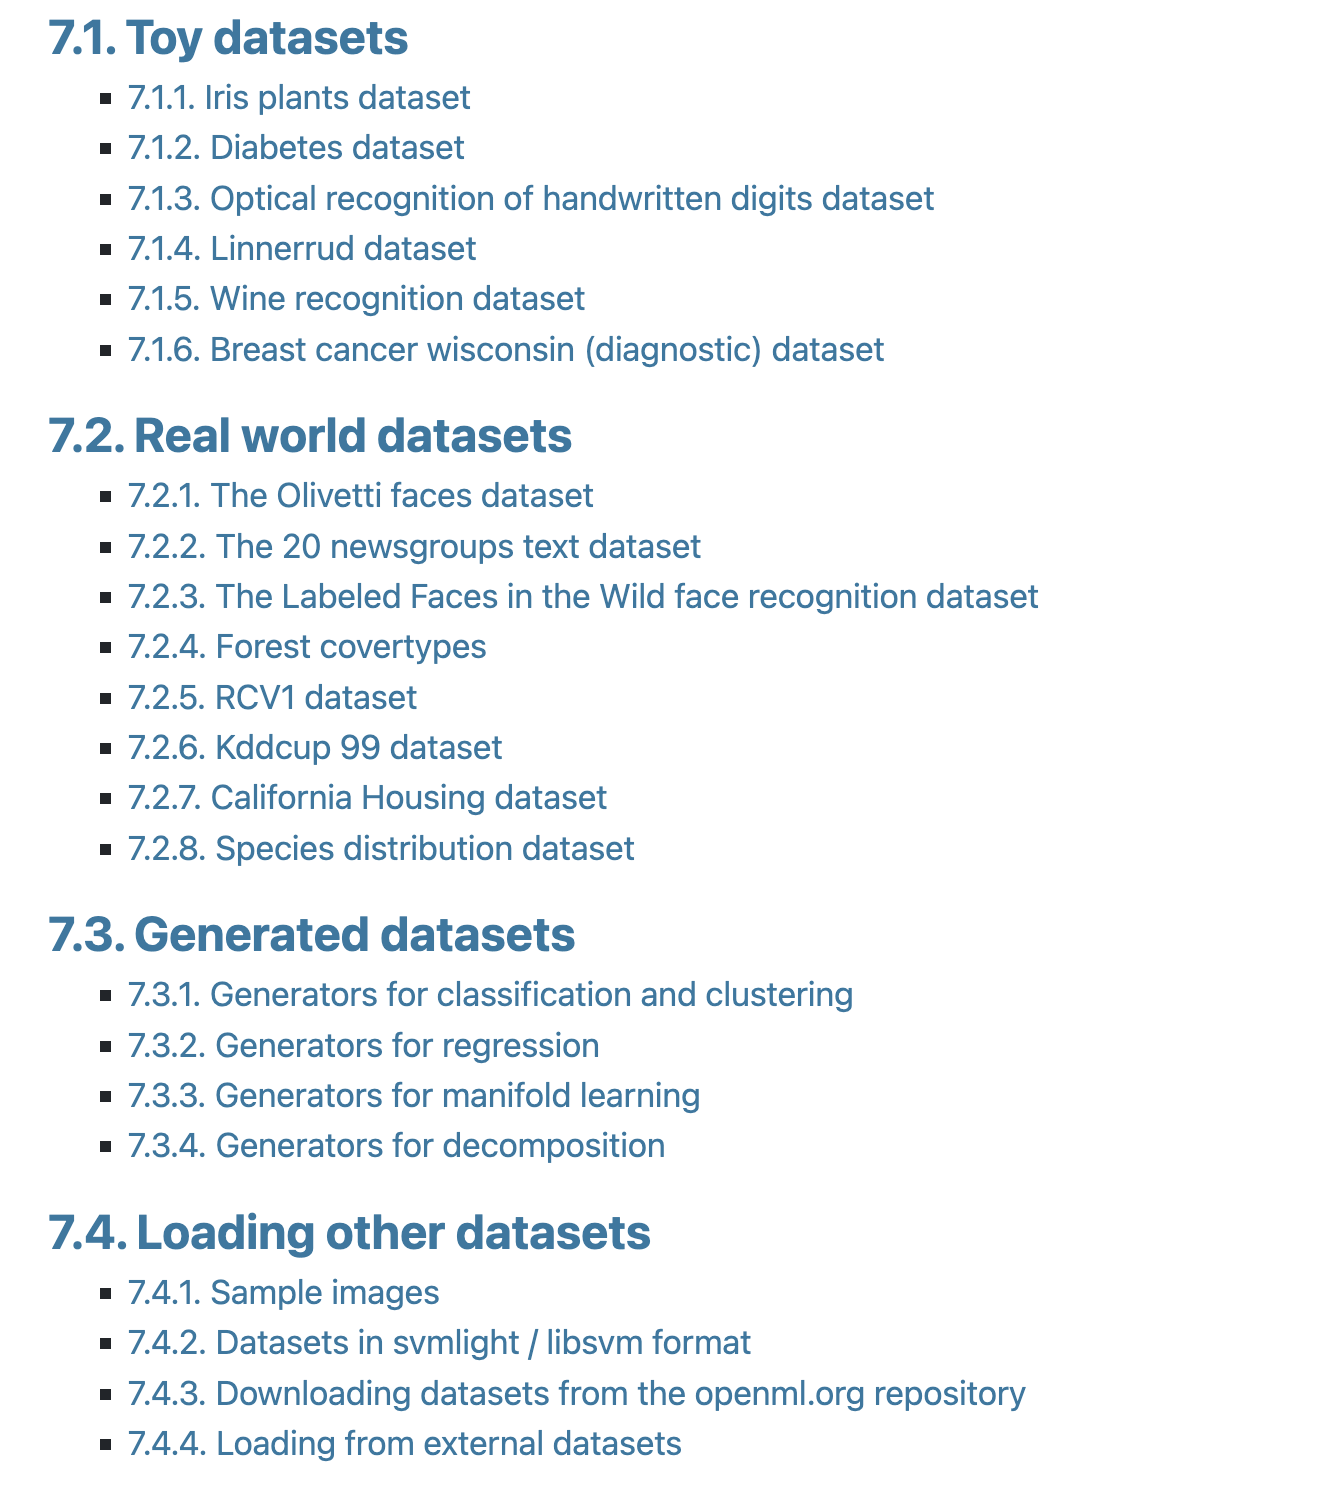

In [20]:
from sklearn.datasets import load_iris, load_digits ,fetch_openml
iris_data = load_iris()
digits = load_digits()
dating_data = fetch_openml("SpeedDating", version=1)

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problems, one or more response variables are stored in the .target member. 

In [21]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [22]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

#  Shape of the data arrays

The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8)

In [17]:
print("Keys of iris_dataset: {}".format(iris_data.keys()))


print(iris_data['DESCR'][:193] + "\n...")


Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [3]:
print("Targets: {}".format(iris_data['target_names']))
print("Features: {}".format(iris_data['feature_names']))
print("Shape of data: {}".format(iris_data['data'].shape))
print("First 5 rows:\n{}".format(iris_data['data'][:5]))
print("Targets:\n{}".format(iris_data['target']))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Loading from external datasets

scikit-learn works on any numeric data stored as numpy arrays or scipy sparse matrices. Other types that are convertible to numeric arrays such as pandas DataFrame are also acceptable.

Here are some recommended ways to load standard columnar data into a format usable by scikit-learn:

pandas.io provides tools to read data from common formats including CSV, Excel, JSON and SQL. DataFrames may also be constructed from lists of tuples or dicts. Pandas handles heterogeneous data smoothly and provides tools for manipulation and conversion into a numeric array suitable for scikit-learn.

scipy.io specializes in binary formats often used in scientific computing context such as .mat and .arff

numpy/routines.io for standard loading of columnar data into numpy arrays

scikit-learn’s load_svmlight_file for the svmlight or libSVM sparse format

scikit-learn’s load_files for directories of text files where the name of each directory is the name of each category and each file inside of each directory corresponds to one sample from that category

For some miscellaneous data such as images, videos, and audio, you may wish to refer to:

skimage.io or Imageio for loading images and videos into numpy arrays

scipy.io.wavfile.read for reading WAV files into a numpy array

Categorical (or nominal) features stored as strings (common in pandas DataFrames) will need converting to numerical features using OneHotEncoder or OrdinalEncoder or similar. S

# LEARNINNG 
# Building models

In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).
\

## All scikitlearn estimators follow the same interface

class SupervisedEstimator(...):

    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score

An example of an estimator is the class sklearn.svm.SVC, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

For now, we will consider the estimator as a black box:

In [24]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(digits.data[:-1], digits.target[:-1])
clf.predict(digits.data[-1:])

array([8])

The corresponding image is:

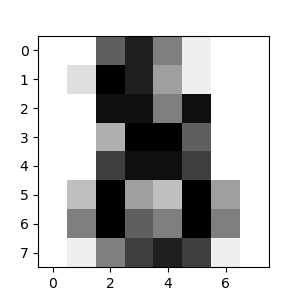
As you can see, it is a challenging task: after all, the images are of poor resolution. Do you agree with the classifier?

# Training and testing data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [6]:
X, y = iris_data['data'], iris_data['target']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X,y, stratify=y, train_size=0.1, test_size=0.05)
print("Xs_train shape: {}".format(Xs_train.shape))
print("Xs_test shape: {}".format(Xs_test.shape))

Xs_train shape: (15, 4)
Xs_test shape: (8, 4)


# Fitting a model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Making predictions

In [11]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_data['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


# Evaluating the model

In [12]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [13]:
knn.score(X_test, y_test)

0.9736842105263158

In [14]:
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))

Score: 0.97
